## Gradient Boosting Classification

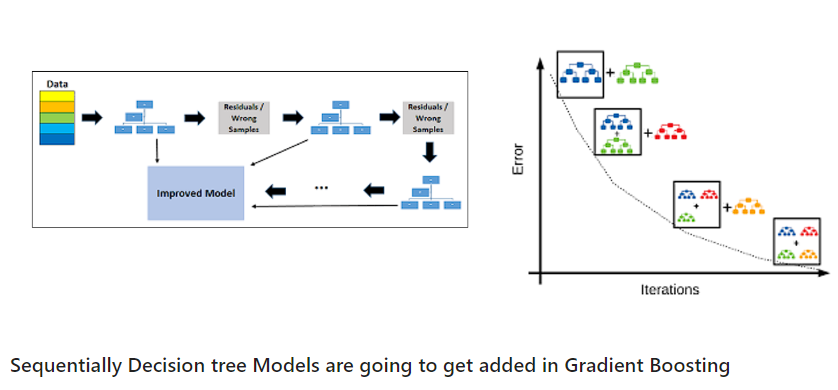

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

Read The train Dataset

In [3]:
import pandas as pd
df = pd.read_csv('train_titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.duplicated().sum()

0

seaparating X and Y

In [8]:
X = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'])
Y = df[['Survived']]

In [9]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [10]:
Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


Separate Categorical and Continuous feature for X

In [12]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [13]:
cat

['Sex', 'Embarked']

In [14]:
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

Create Preprocessing Pipeline

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [16]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())])

In [18]:
cat_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                           ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [19]:
pre = ColumnTransformer([('num', num_pipe, con),
                         ('cat', cat_pipe, cat)]).set_output(transform='pandas')

In [20]:
X_pre = pre.fit_transform(X)
X_pre.head()


,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.0,1.0,0.0,0.0,1.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,1.0,0.0,1.0,0.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,1.0,0.0,0.0,0.0,1.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,1.0,0.0,0.0,0.0,1.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0


Train Test Split

In [21]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=21)

In [22]:
xtrain.shape

(712, 10)

In [23]:
ytrain.shape

(712, 1)

In [24]:
xtest.shape

(179, 10)

In [26]:
ytest.shape

(179, 1)

Create a Gradient Boosting Classifier

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=1, learning_rate=0.4, max_depth=1, min_samples_leaf=3, min_samples_split=3)
model.fit(xtrain, ytrain)

GradientBoostingClassifier(learning_rate=0.4, max_depth=1, min_samples_leaf=3,
                           min_samples_split=3, n_estimators=1)

In [28]:
model.score(xtrain, ytrain)

0.7879213483146067

In [30]:
model.score(xtest, ytest)

0.7821229050279329

Getting max accuracy of 78%

For imporving the score need to perform Hyperparameter tuning

In [31]:
params = {'n_estimators':[10,50,100,200,300],
          'learning_rate':[0.01, 0.1, 0.15, 0.2],
          'max_depth':[2, 3, 4, 5, 6, 7],
          'min_samples_split':[5, 6, 7, 8, 9],
          'min_samples_leaf':[5, 6, 7, 8, 9]}

In [32]:
from sklearn.model_selection import RandomizedSearchCV
gbc = GradientBoostingClassifier()
rscv = RandomizedSearchCV(gbc, param_distributions=params, cv=5, scoring='f1_macro')
rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_leaf': [5, 6, 7, 8, 9],
                                        'min_samples_split': [5, 6, 7, 8, 9],
                                        'n_estimators': [10, 50, 100, 200,
                                                         300]},
                   scoring='f1_macro')

In [33]:
rscv.best_score_

0.8129638807707877

In [34]:
rscv.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_depth': 7,
 'learning_rate': 0.01}

In [36]:
best_gbc = rscv.best_estimator_
best_gbc

GradientBoostingClassifier(learning_rate=0.01, max_depth=7, min_samples_leaf=5,
                           min_samples_split=5, n_estimators=200)

In [37]:
best_gbc.score(xtrain, ytrain)

0.9101123595505618

In [38]:
best_gbc.score(xtest, ytest)

0.8268156424581006

Perform predictions on Train and test

In [39]:
ypred_tr = best_gbc.predict(xtrain)
ypred_ts = best_gbc.predict(xtest)

In [40]:
ypred_tr[0:5]

array([0, 0, 1, 1, 0], dtype=int64)

In [41]:
ytrain.head()

,Survived
793,0
23,1
97,1
9,1
157,0


In [42]:
ypred_ts[0:5]

array([1, 0, 0, 1, 0], dtype=int64)

In [43]:
ytest.head()

,Survived
617,0
379,0
725,0
826,0
450,0


Create a confusion matrix for test

In [44]:
best_gbc.classes_

array([0, 1], dtype=int64)

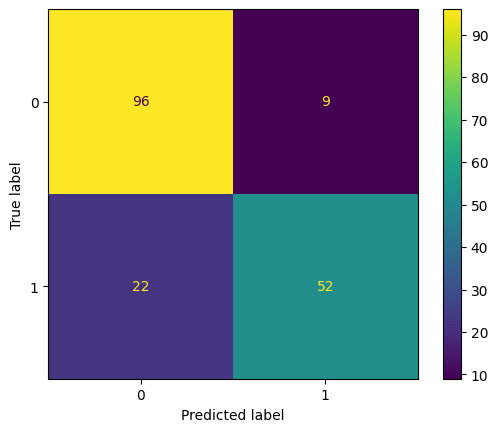

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=best_gbc.classes_)
cfd.plot()

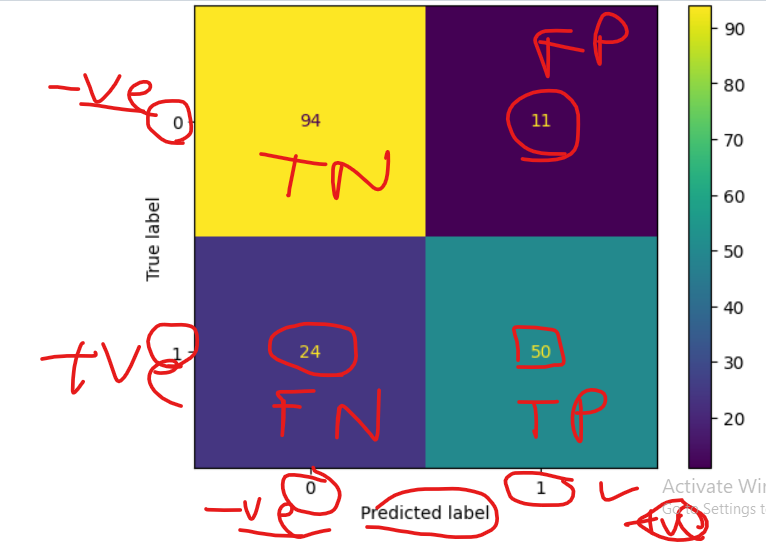

Print Classification Report

In [46]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       105
           1       0.85      0.70      0.77        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.82       179



Because model accuracy and f1 score are around 80% this is a good model, using above model for prediction of out of sample data

Predciting out of sample data

In [47]:
xnew = pd.read_csv('test_titanic.csv')
xnew.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [48]:
xnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [49]:
xnew.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [50]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex', 'Embarked'])])

Apply pre.transform on xnew

In [51]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.827377,0.394887,-0.474545,-0.473674,-0.490783,0.0,1.0,0.0,1.0,0.0
1,0.827377,1.355510,0.432793,-0.473674,-0.507479,1.0,0.0,0.0,0.0,1.0
2,-0.369365,2.508257,-0.474545,-0.473674,-0.453367,0.0,1.0,0.0,1.0,0.0
3,0.827377,-0.181487,-0.474545,-0.473674,-0.474005,0.0,1.0,0.0,0.0,1.0
4,0.827377,-0.565736,0.432793,0.767630,-0.401017,1.0,0.0,0.0,0.0,1.0


Predict the results for xnew

In [52]:
preds = best_gbc.predict(xnew_pre)
preds[0:5]

array([0, 0, 0, 0, 1], dtype=int64)

In [53]:
best_gbc.classes_

array([0, 1], dtype=int64)

In [54]:
probs = best_gbc.predict_proba(xnew_pre)[:,1]
probs[0:5]

array([0.13942344, 0.28335151, 0.15782467, 0.14035514, 0.66972408])

Save above results in csv

In [55]:
df_final = xnew[['PassengerId']]
df_final

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [56]:
df_final['Survived_pred'] = preds
df_final['prob'] = probs

In [57]:
df_final

,PassengerId,Survived_pred,prob
0,892,0,0.139423
1,893,0,0.283352
2,894,0,0.157825
3,895,0,0.140355
4,896,1,0.669724
...,...,...,...
413,1305,0,0.126075
414,1306,1,0.904399
415,1307,0,0.118661
416,1308,0,0.126075


In [58]:
df_final['Survived_pred'].value_counts()

Survived_pred
0    281
1    137
Name: count, dtype: int64

<Axes: xlabel='Survived_pred'>

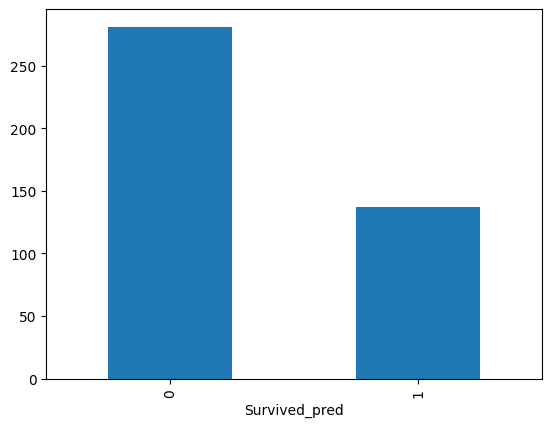

In [59]:
df_final['Survived_pred'].value_counts().plot(kind='bar')

Plot the feature importances for the data

In [60]:
imp = best_gbc.feature_importances_
imp

array([0.1101036 , 0.1433826 , 0.04724644, 0.01697512, 0.22846593,
       0.19396233, 0.23038521, 0.00910343, 0.00128025, 0.01909508])

In [61]:
xtrain.columns

Index(['num__Pclass', 'num__Age', 'num__SibSp', 'num__Parch', 'num__Fare',
       'cat__Sex_female', 'cat__Sex_male', 'cat__Embarked_C',
       'cat__Embarked_Q', 'cat__Embarked_S'],
      dtype='object')

In [62]:
imp = pd.Series(imp)
imp.index = xtrain.columns

In [63]:
imp

num__Pclass        0.110104
num__Age           0.143383
num__SibSp         0.047246
num__Parch         0.016975
num__Fare          0.228466
cat__Sex_female    0.193962
cat__Sex_male      0.230385
cat__Embarked_C    0.009103
cat__Embarked_Q    0.001280
cat__Embarked_S    0.019095
dtype: float64

In [64]:
imp = imp.sort_values(ascending=False)
imp

cat__Sex_male      0.230385
num__Fare          0.228466
cat__Sex_female    0.193962
num__Age           0.143383
num__Pclass        0.110104
num__SibSp         0.047246
cat__Embarked_S    0.019095
num__Parch         0.016975
cat__Embarked_C    0.009103
cat__Embarked_Q    0.001280
dtype: float64

<Axes: title={'center': 'Feature Importances'}>

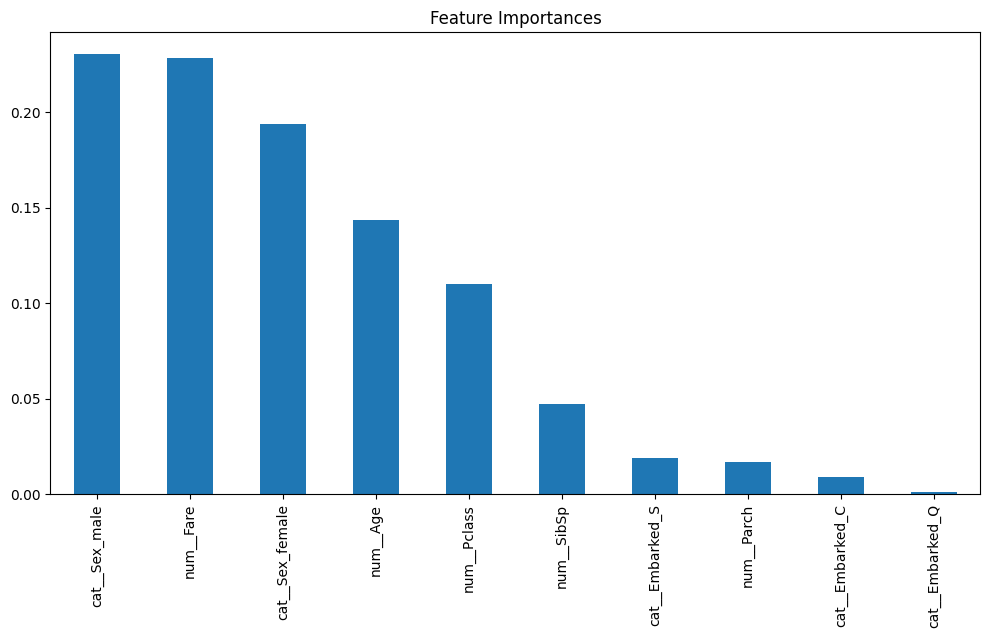

In [65]:
imp.plot(kind='bar', title='Feature Importances', figsize=(12, 6))